In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
df =pd.read_csv('Travel.csv')
df

,Timestamp,Are you from Jaipur?,What is your age?,What is your gender?,What is your departure address (with pincode)?,What is your destination address? (with pincode),What is your mode of transportation?,"If Public Transport, Do you get seat availability easily?",If personal vehicles do you find a parking space easily?,How long do you wait for Public Transport?,...,What type of stoppage?,How many traffic lights do you have to pass during your travel journey ?,How many junctions during your travel journey?,How many road blocks during your travel journey?,Can you reach your destination on Time?,Can you reach your home on Time?,What is the weather condition before leaving home?,When did this journey take place?,When did you travel?,"Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc."
0,2024/12/31 9:56:27 am GMT+5:30,Yes,20-29,Male,"2/627, Sector 2, Malviya Nagar, Jaipur, Rajast...","BISR, Statue Circle, C Scheme, Jaipur, Rajasth...",Public Transport,No,No,31-60 Minutes,...,Traffic Light,6,0,0,Yes,No,Sunny,Working Day,Weekday,Chaotic
1,2024/12/31 12:35:40 pm GMT+5:30,Yes,19 and below,Female,Flat no 201 Vatsalya Enclave Ganesh Nagar Iskc...,Birla Institute of Technology Jaipur Near Apex...,Cabs Services,NaN,NaN,NaN,...,Traffic Light,5,0,0,Yes,Yes,Cloudy,Working Day,Weekday,Mesmerized!
2,2024/12/31 12:54:10 pm GMT+5:30,Yes,19 and below,Male,"Swastik Villas, New Sanganer Road, Jaipur(302020)","Bit Jaipur, Malviya Nagar, Jaipur(302017)",Two Wheeler,No,Yes,31-60 Minutes,...,Traffic Light,4,5,2,Yes,No,Cloudy,Working Day,Weekday,Polluted
3,2024/12/31 2:49:46 pm GMT+5:30,Yes,19 and below,Male,305001,302017,Public Transport,Yes,Yes,0-30 Minutes,...,NaN,1,0,0,Yes,Yes,Sunny,Working Day,Weekday,NaN
4,2024/12/31 2:57:22 pm GMT+5:30,Yes,19 and below,Male,24/25 sagar apartments,Same,Two Wheeler,No,Yes,0-30 Minutes,...,Traffic Light,6,NaN,NaN,No,NaN,Sunny,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,2025/01/20 11:58:51 am GMT+5:30,Yes,19 and below,Male,Mansarovar (302020),Lok Kalyan Marg (110011),Public Transport,Yes,No,0-30 Minutes,...,-,3,0,0,Yes,Yes,Sunny,Working Day,Weekday,Good
920,2025/01/20 11:59:10 am GMT+5:30,Yes,20-29,Male,"Dlb Rise apartment , Ganesh nagar , Mansarovar...","127 VHE Vivekanand nagar Kota , 324010",Two Wheeler,Yes,Yes,0-30 Minutes,...,Traffic Light,2,0,0,Yes,Yes,Sunny,Holiday,Weekday,Good
921,2025/01/20 12:07:40 pm GMT+5:30,Yes,20-29,Female,Mansarover 302020,vaishali,Cabs Services,No,No,0-30 Minutes,...,Traffic Light,3,0,2,Yes,No,Cloudy,Working Day,Weekday,So much traffic
922,2025/01/20 12:07:49 pm GMT+5:30,No,20-29,Male,Mansarovar 302020,Raja park 302004,Two Wheeler,Yes,Yes,0-30 Minutes,...,Traffic Light,5 or 6,0,0,Yes,Yes,Sunny,Holiday,Weekend,Hhud


<Axes: >

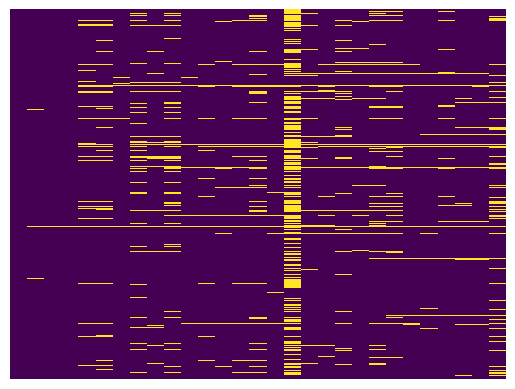

In [2]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis',xticklabels=False)

<Axes: ylabel='Could you kindly specify the tolls?'>

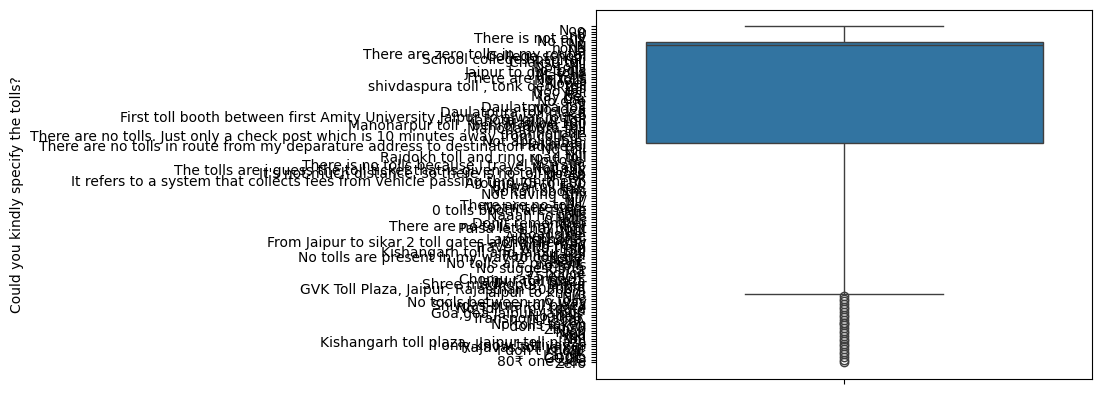

In [32]:
sns.boxplot(df['Could you kindly specify the tolls?'],orient='v')

In [12]:
len(df['Cost of petrol'].unique())

379

In [18]:
df.rename(columns={'Cost of petrol': 'Cost_of_petrol'}, inplace=True)

In [21]:
df.Cost_of_petrol.value_counts().head(10)

Cost_of_petrol
100    56
0      54
200    41
50     34
150    26
500    23
120    20
300    19
60     16
40     10
Name: count, dtype: int64

In [31]:
counts = df['Cost_of_petrol'].value_counts()
specific_count = counts.get('100')
print(specific_count)

56


In [30]:
specific_count = df[df['Cost_of_petrol'] == '100']['Cost_of_petrol'].count()
print(specific_count)

56


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 0 to 923
Data columns (total 29 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   Timestamp                                                                           924 non-null    object
 1   Are you from Jaipur?                                                                919 non-null    object
 2   What is your age?                                                                   922 non-null    object
 3   What is your gender?                                                                919 non-null    object
 4   What is your departure address (with pincode)?                                      871 non-null    object
 5   What is your destination address?  (with pincode)                                   844 non-null    object
 6  

In [11]:
df.rename(columns={'Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc. ':'Feels_while_travel'},inplace=True)

In [22]:
print(df.columns)


Index(['Timestamp', 'Are you from Jaipur?', 'What is your age?',
       'What is your gender?',
       'What is your departure address (with pincode)?',
       'What is your destination address?  (with pincode)',
       'What is your mode of transportation?',
       'If Public Transport, Do you get seat availability easily?',
       'If personal vehicles do you find a parking space easily?',
       'How long do you wait for Public Transport?',
       'What time do you prefer to leave your house to work/school/university/hospital?',
       'How much time (minutes) do you take to travel ?',
       'What time do you prefer to leave your work/school/university/ hospital for home?',
       'How long time (minutes) do you travel?', 'Cost_of_petrol',
       'How many toll booth are there from your house to work/school/university/ hospital?',
       'Could you kindly specify the tolls?',
       'Could you kindly tell your normally driving mood during driving time?',
       'How many stops duri

In [14]:
df.columns= df.columns.str.strip() ## removing the trailing spaces from the col

In [28]:
## lets make the list of the most frequent categories of the variable

top_10 = [x for x in df.Cost_of_petrol.value_counts().sort_values(ascending=False).head(10).index]
top_10

['100', '0', '200', '50', '150', '500', '120', '300', '60', '40']

In [29]:
# and now wwe make the 10 binary variables 

for label in top_10:
    df[label]=np.where(df[''])